In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/wesad-main')

In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from collections import Counter
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

In [11]:
!pip install autokeras
import autokeras as ak

print("AutoKeras version:", ak.__version__)

AutoKeras version: 2.0.0


In [12]:
from ae_feature_extractor import autoencoder
ae = autoencoder ()

## Chest and Wrist Physio modalities classification

In [13]:

# Initialize lists to store results
scores_all = []
cms = []

# Loop through each subject for LOSO validation
for sid in ae.ids:
    print(f"Processing Subject {sid}...")

    # Load training and testing features
    feat = np.array(pd.read_pickle(f"/content/drive/MyDrive/Colab Notebooks/wesad-main/features/train/feat_loso{sid}.pkl"))
    feat_test = np.array(pd.read_pickle(f"/content/drive/MyDrive/Colab Notebooks/wesad-main/features/test/feat_loso{sid}.pkl"))

    # Separate features and labels
    y = feat[:, -1].astype(int)
    x = feat[:, :-1]
    y_test = feat_test[:, -1].astype(int)
    x_test = feat_test[:, :-1]

    # Apply SMOTE to balance the classes
    smote = SMOTE(random_state=42)
    x, y = smote.fit_resample(x, y)
    print("Resampled training label distribution:", Counter(y))

    # Standardize features using the same scaler
    scaler = StandardScaler()
    x = scaler.fit_transform(x)  # Fit on training data
    x_test = scaler.transform(x_test)  # Transform test data using the same scaler

    # Verify scaling
    print("Training data range: min =", x.min(), ", max =", x.max())
    print("Test data range: min =", x_test.min(), ", max =", x_test.max())

    rf = RandomForestClassifier(random_state=42)
    rf.fit(x, y)

    y_pred = rf.predict(x_test)
    print("Random Forest Predictions:", y_pred[:10])

    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    cm = confusion_matrix(y_test, y_pred)


    # Print results for this subject
    print(f"Subject {sid} - Accuracy: {acc:.4f}, F1 Score: {f1:.4f}")

    # Store results
    scores_all.append([sid, acc, precision, recall, f1])
    cms.append(cm)

Processing Subject 2...
Resampled training label distribution: Counter({np.int64(1): 16467, np.int64(2): 16467, np.int64(3): 16467})
Training data range: min = -2.9269250547312993 , max = 112.28086449412356
Test data range: min = -2.9269250547312993 , max = 96.3400811299352
Random Forest Predictions: [2 2 2 2 2 2 2 2 2 2]
Subject 2 - Accuracy: 0.9095, F1 Score: 0.9098
Processing Subject 3...
Resampled training label distribution: Counter({np.int64(1): 16471, np.int64(2): 16471, np.int64(3): 16471})
Training data range: min = -3.5353142855382407 , max = 142.0181321261874
Test data range: min = -3.5353142855382407 , max = 70.19441109199128
Random Forest Predictions: [2 2 2 2 2 2 2 2 2 2]
Subject 3 - Accuracy: 0.8106, F1 Score: 0.8135
Processing Subject 4...
Resampled training label distribution: Counter({np.int64(1): 16453, np.int64(2): 16453, np.int64(3): 16453})
Training data range: min = -3.0810542741287352 , max = 153.5896648973645
Test data range: min = -3.0810542741287352 , max = 5

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Resampled training label distribution: Counter({np.int64(1): 16413, np.int64(2): 16413, np.int64(3): 16413})
Training data range: min = -3.5100143509877335 , max = 137.40534969375264
Test data range: min = -3.5100143509877335 , max = 71.21427170698017
Random Forest Predictions: [1 1 2 2 1 1 1 1 1 2]
Subject 5 - Accuracy: 0.9323, F1 Score: 0.9352
Processing Subject 6...
Resampled training label distribution: Counter({np.int64(1): 16431, np.int64(2): 16431, np.int64(3): 16431})
Training data range: min = -2.727874019779669 , max = 109.18453309910532
Test data range: min = -2.727874019779669 , max = 126.38882011229494
Random Forest Predictions: [2 2 2 2 2 2 2 2 2 2]
Subject 6 - Accuracy: 0.9496, F1 Score: 0.9503
Processing Subject 7...
Resampled training label distribution: Counter({np.int64(1): 16425, np.int64(2): 16425, np.int64(3): 16425})
Training data range: min = -2.9874155335267987 , max = 109.23486020608343
Test data range: min = -2.9874155335267987 , max = 69.4573260406615
Random

In [14]:
np.array(scores_all)[:,1].mean() #accuracy

np.float64(0.8507245467626026)

In [15]:
np.array(scores_all)[:,1].std()

np.float64(0.09940748865543617)

In [16]:
np.array(scores_all)[:,2].mean() #precision

np.float64(0.84372511563504)

In [17]:
np.array(scores_all)[:,2].std()

np.float64(0.10648419089965644)

In [18]:
np.array(scores_all)[:,3].mean() #recall

np.float64(0.8507245467626026)

In [19]:
np.array(scores_all)[:,3].std()

np.float64(0.09940748865543617)

In [20]:
np.array(scores_all)[:,4].mean() #f1-score

np.float64(0.8290921569403772)

In [21]:
np.array(scores_all)[:,4].std()

np.float64(0.11378282997092498)

### Confusion Matrices per subject and for all subjects combined

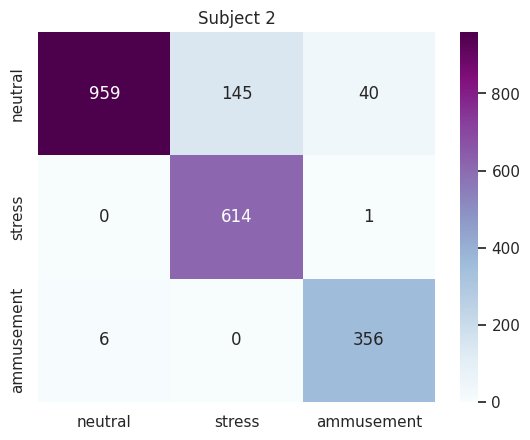

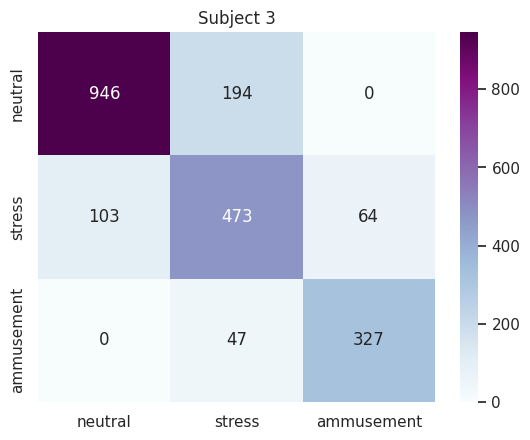

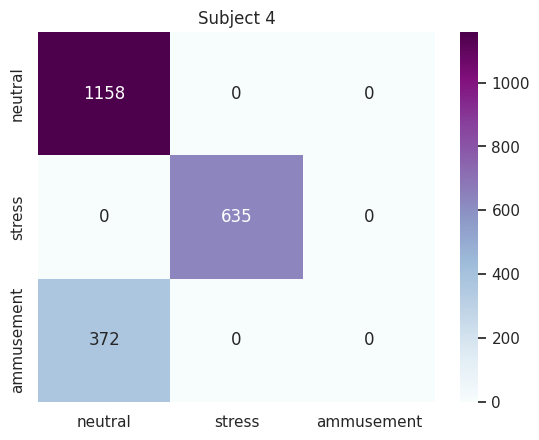

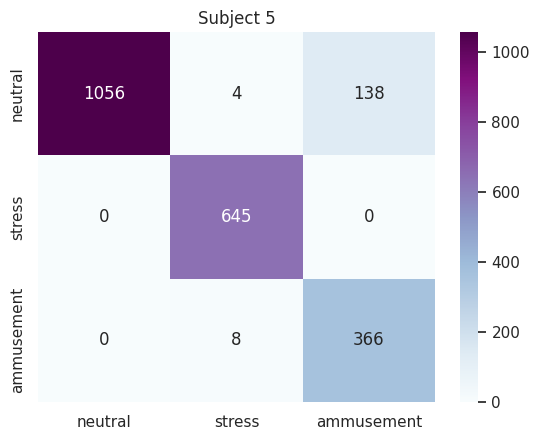

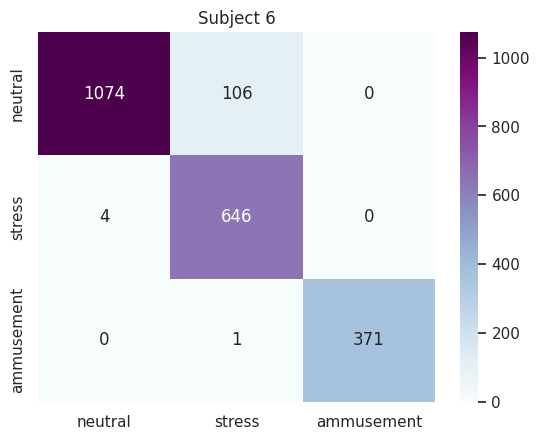

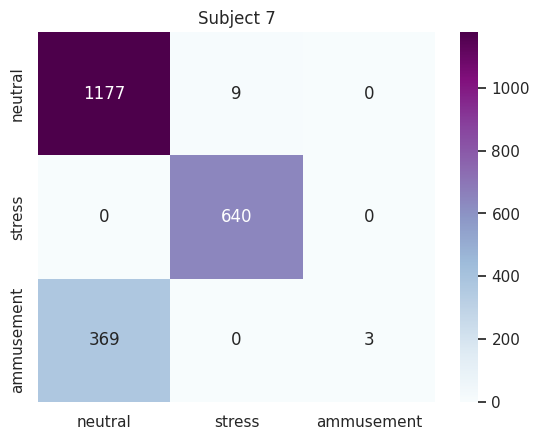

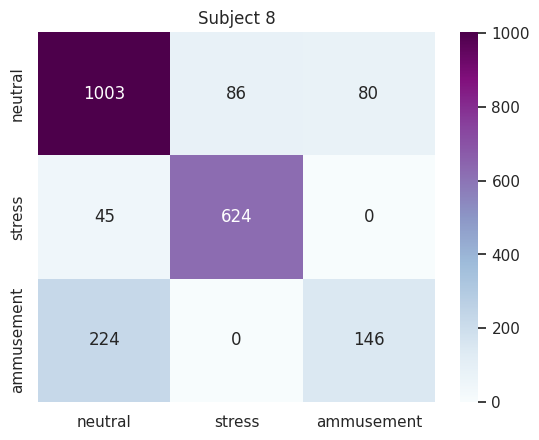

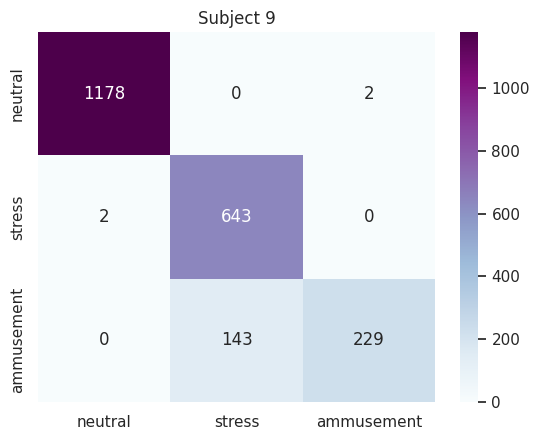

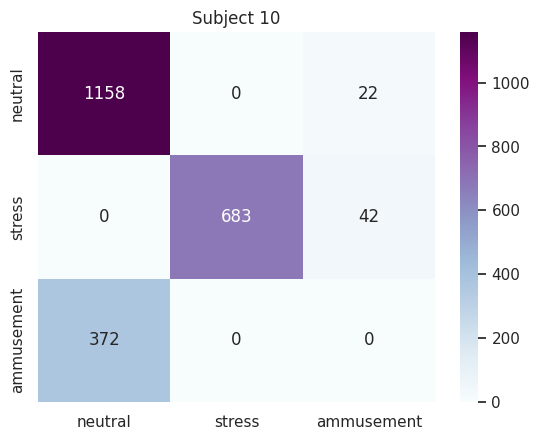

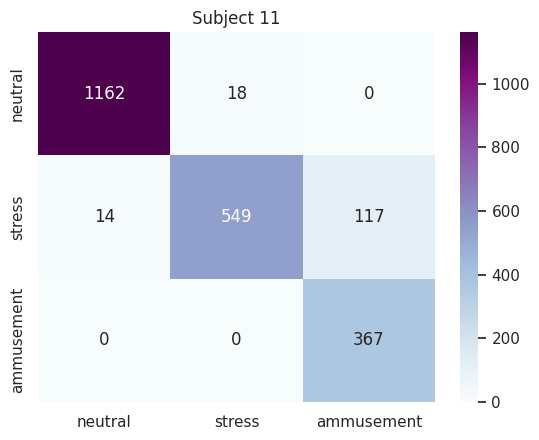

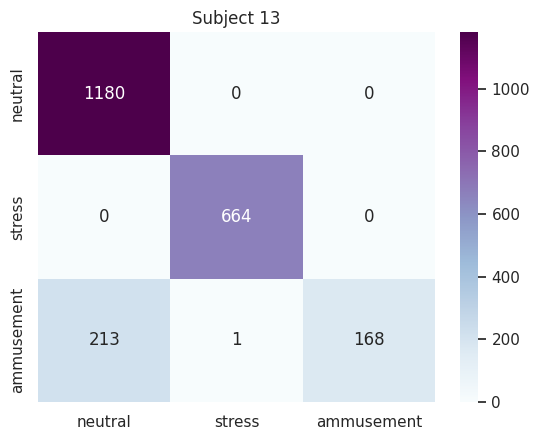

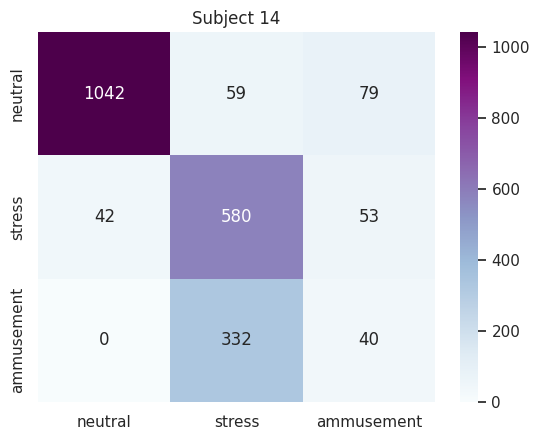

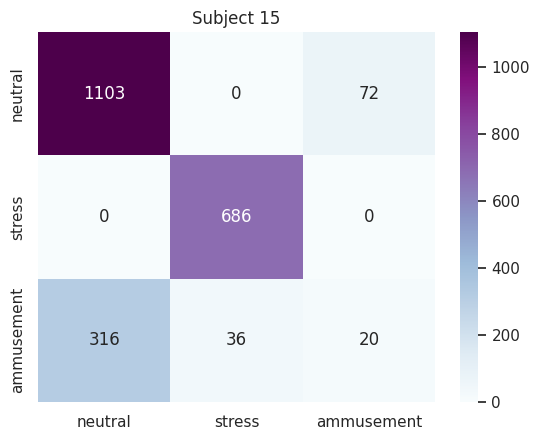

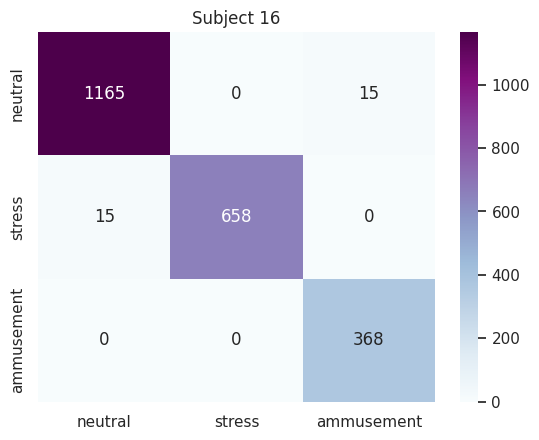

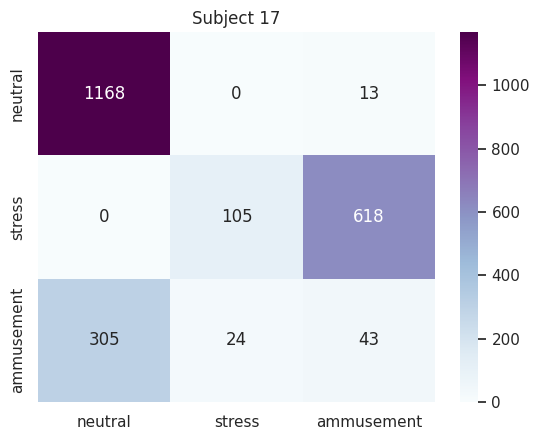

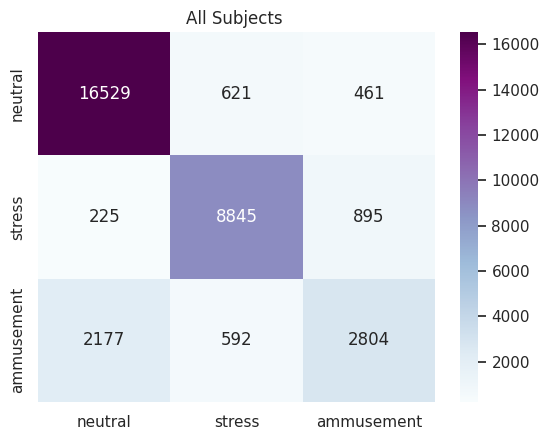

In [22]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
cm_all = np.zeros((3,3))
class_names = ['neutral', 'stress', 'ammusement']
for sid, cm in list(zip(np.array(scores_all)[:,0], cms)):
    #print("Subject ", int(sid))
    cm_all += cm
    df_cm = pd.DataFrame(cm, columns=class_names, index=class_names)
    sn.set(font_scale=1) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
    plt.title("Subject " + str(int(sid)))
    plt.show()

df_cm = pd.DataFrame(cm_all.astype(int), columns=class_names, index=class_names)
sn.set(font_scale=1) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
plt.title("All Subjects ")
plt.show()


## Chest only physio modalities classification

In [23]:
# use chest only features for classification
scores_c = []
cms = []

for sid in ae.ids:
    feat = np.array(pd.read_pickle ("/content/drive/MyDrive/Colab Notebooks/wesad-main/features/train/feat_loso" + str(sid) + ".pkl"))
    feat_test = np.array(pd.read_pickle ("/content/drive/MyDrive/Colab Notebooks/wesad-main/features/test/feat_loso" + str(sid) + ".pkl"))

    y = feat[:,-1]
    x = feat[:,:80]
    y_test = feat_test[:,-1]
    x_test = feat_test[:,:80]

    # Apply SMOTE to balance the classes
    smote = SMOTE(random_state=42)
    x, y = smote.fit_resample(x, y)
    print("Resampled training label distribution:", Counter(y))

    # Standardize features using the same scaler
    scaler = StandardScaler()
    x = scaler.fit_transform(x)  # Fit on training data
    x_test = scaler.transform(x_test)  # Transform test data using the same scaler

    # Verify scaling
    print("Training data range: min =", x.min(), ", max =", x.max())
    print("Test data range: min =", x_test.min(), ", max =", x_test.max())

    rf = RandomForestClassifier(random_state=42)
    rf.fit(x, y)

    y_pred = rf.predict(x_test)
    print("Random Forest Predictions:", y_pred[:10])

    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    cm = confusion_matrix(y_test, y_pred)


    # Print results for this subject
    print(f"Subject {sid} - Accuracy: {acc:.4f}, F1 Score: {f1:.4f}")

    scores_c.append([sid, acc, precision, recall, f1])
    cms.append(cm)

Resampled training label distribution: Counter({np.float64(1.0): 16467, np.float64(2.0): 16467, np.float64(3.0): 16467})
Training data range: min = -2.7751347731422316 , max = 101.03883645884959
Test data range: min = -2.7751347731422316 , max = 95.57495363619394
Random Forest Predictions: [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
Subject 2 - Accuracy: 0.5540, F1 Score: 0.5559
Resampled training label distribution: Counter({np.float64(1.0): 16471, np.float64(2.0): 16471, np.float64(3.0): 16471})
Training data range: min = -2.7478612322424887 , max = 87.02509125649892
Test data range: min = -2.7478612322424887 , max = 56.43470283583581
Random Forest Predictions: [3. 3. 3. 3. 2. 3. 2. 2. 3. 3.]
Subject 3 - Accuracy: 0.7270, F1 Score: 0.7300
Resampled training label distribution: Counter({np.float64(1.0): 16453, np.float64(2.0): 16453, np.float64(3.0): 16453})
Training data range: min = -2.664317740690261 , max = 99.51293622683713
Test data range: min = -2.664317740690261 , max = 53.28825743517794


In [24]:
np.array(scores_c)[:,1].mean() #accuracy

np.float64(0.8069078051213877)

In [25]:
np.array(scores_c)[:,1].std()

np.float64(0.15135810267623062)

In [26]:
np.array(scores_c)[:,2].mean() #precision

np.float64(0.7769126793211079)

In [27]:
np.array(scores_c)[:,2].std()

np.float64(0.14800867970202197)

In [28]:
np.array(scores_c)[:,3].mean() #recall

np.float64(0.8069078051213877)

In [29]:
np.array(scores_c)[:,3].std()

np.float64(0.15135810267623062)

In [30]:
np.array(scores_c)[:,4].mean() #f1-score

np.float64(0.7797722296105634)

In [31]:
np.array(scores_c)[:,4].std()

np.float64(0.14803499843550733)

### Confusion Matrices per subject and for all subjects combined

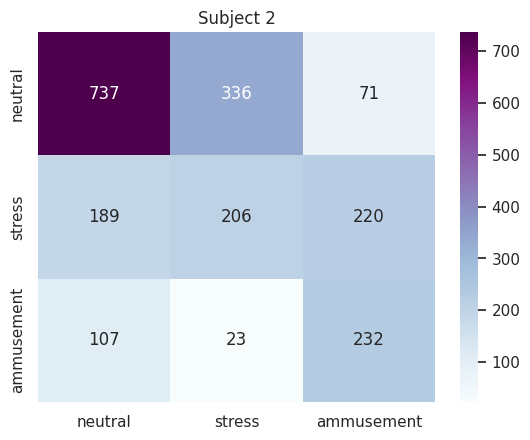

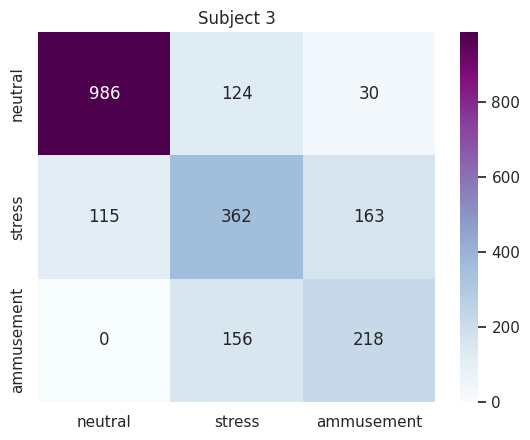

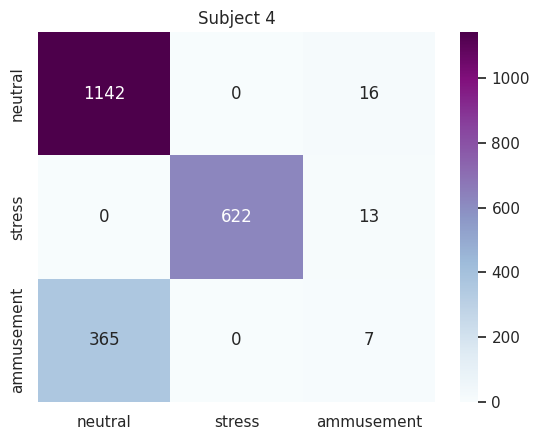

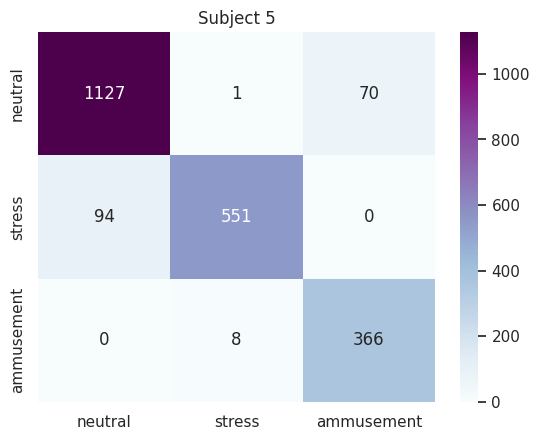

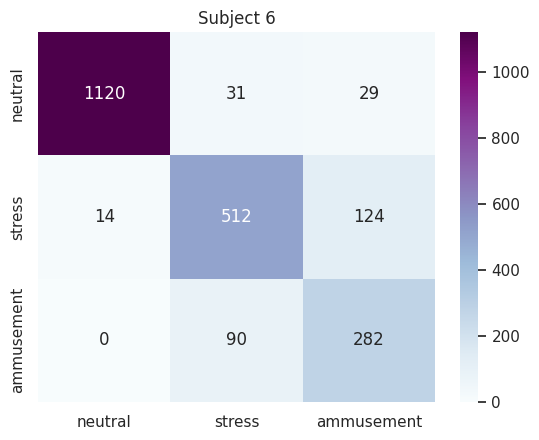

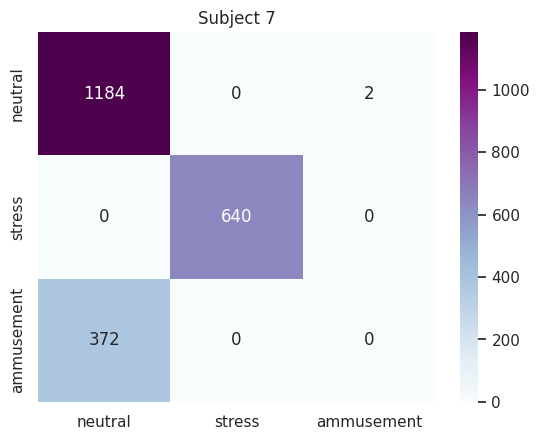

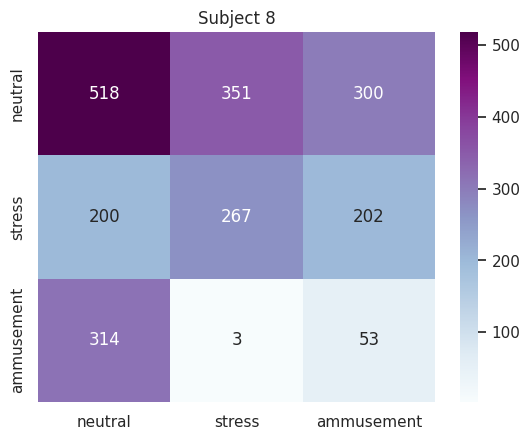

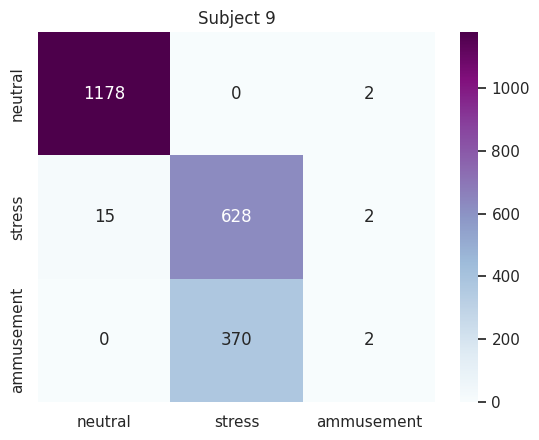

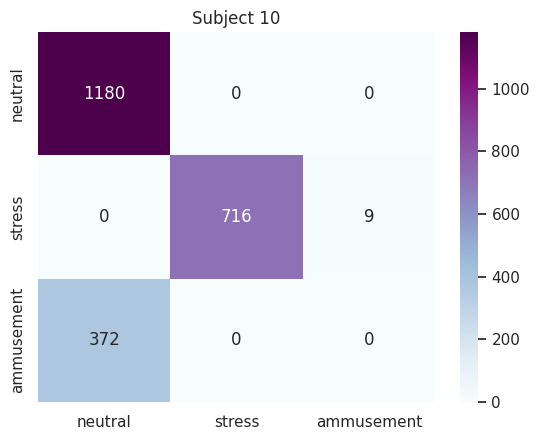

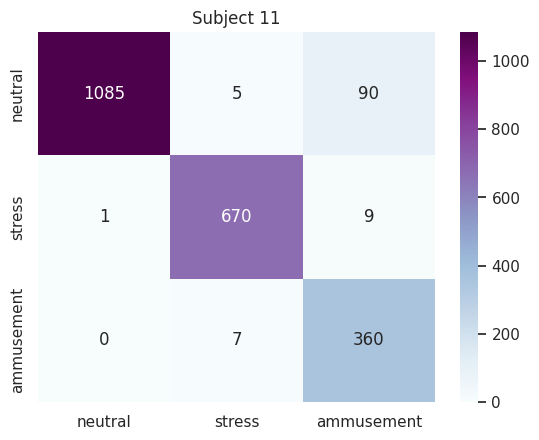

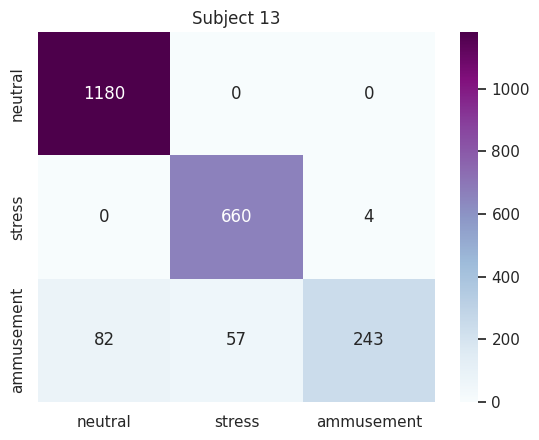

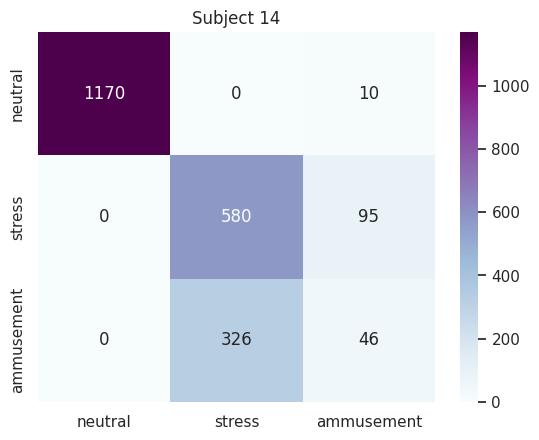

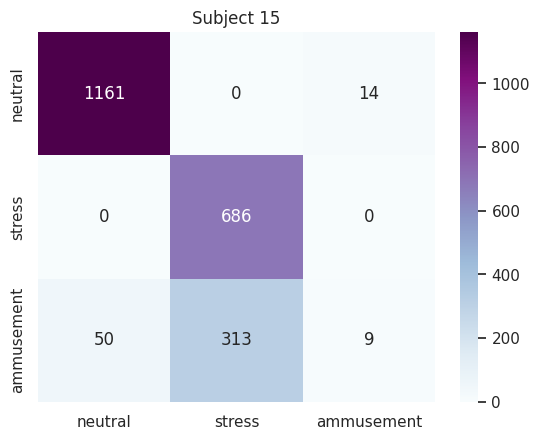

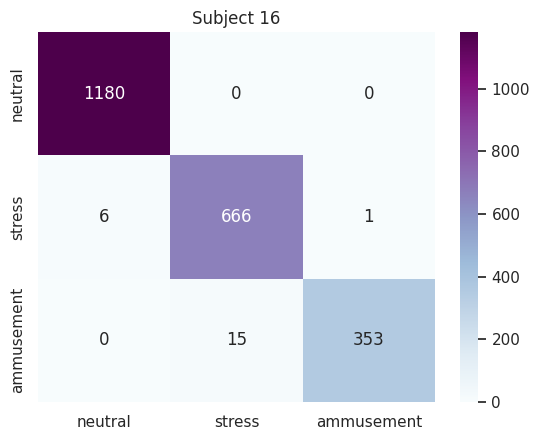

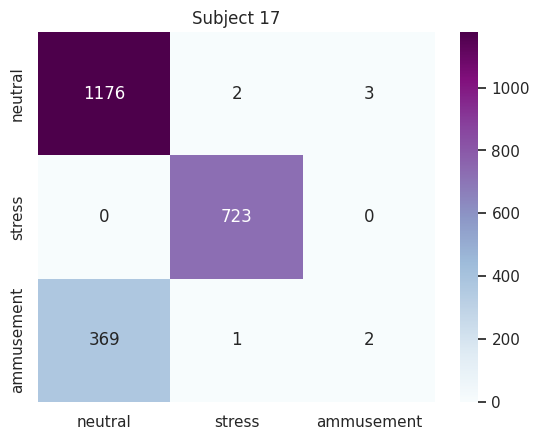

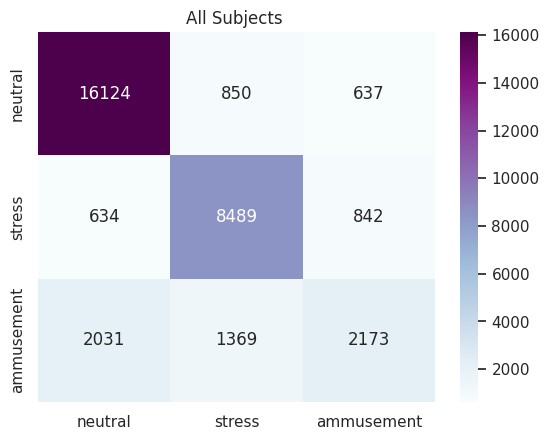

In [32]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
cm_all = np.zeros((3,3))
class_names = ['neutral', 'stress', 'ammusement']
for sid, cm in list(zip(np.array(scores_c)[:,0], cms)):
    #print("Subject ", int(sid))
    cm_all += cm
    df_cm = pd.DataFrame(cm, columns=class_names, index=class_names)
    sn.set(font_scale=1) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
    plt.title("Subject " + str(int(sid)))
    plt.show()

df_cm = pd.DataFrame(cm_all.astype(int), columns=class_names, index=class_names)
sn.set(font_scale=1) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
plt.title("All Subjects ")
plt.show()

## Wrist only physio modalities classification

In [33]:
# Initialize lists to store results
scores_w = []
cms = []

# Loop through each subject for LOSO validation
for sid in ae.ids:
    # Load training and testing features
    feat = np.array(pd.read_pickle(f"/content/drive/MyDrive/Colab Notebooks/wesad-main/features/train/feat_loso{sid}.pkl"))
    feat_test = np.array(pd.read_pickle(f"/content/drive/MyDrive/Colab Notebooks/wesad-main/features/test/feat_loso{sid}.pkl"))

    # Extract wrist-only features
    y = feat[:, -1]
    x = feat[:, 80:-1]
    y_test = feat_test[:, -1]
    x_test = feat_test[:, 80:-1]

    # Apply SMOTE to balance the classes
    smote = SMOTE(random_state=42)
    x, y = smote.fit_resample(x, y)
    print("Resampled training label distribution:", Counter(y))

    # Standardize features using the same scaler
    scaler = StandardScaler()
    x = scaler.fit_transform(x)  # Fit on training data
    x_test = scaler.transform(x_test)  # Transform test data using the same scaler

    # Verify scaling
    print("Training data range: min =", x.min(), ", max =", x.max())
    print("Test data range: min =", x_test.min(), ", max =", x_test.max())

    rf = RandomForestClassifier(random_state=42)
    rf.fit(x, y)

    y_pred = rf.predict(x_test)
    print("Random Forest Predictions:", y_pred[:10])

    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    cm = confusion_matrix(y_test, y_pred)


    # Print results for this subject
    print(f"Subject {sid} - Accuracy: {acc:.4f}, F1 Score: {f1:.4f}")

    # Store results
    scores_w.append([sid, acc, precision, recall, f1])
    cms.append(cm)

Resampled training label distribution: Counter({np.float64(1.0): 16467, np.float64(2.0): 16467, np.float64(3.0): 16467})
Training data range: min = -2.830993980889485 , max = 106.92887770076894
Test data range: min = -2.830993980889485 , max = 39.23355134833543
Random Forest Predictions: [2. 1. 1. 1. 2. 1. 2. 1. 2. 1.]
Subject 2 - Accuracy: 0.8336, F1 Score: 0.8254
Resampled training label distribution: Counter({np.float64(1.0): 16471, np.float64(2.0): 16471, np.float64(3.0): 16471})
Training data range: min = -3.3930946486165245 , max = 141.667411210031
Test data range: min = -3.3930946486165245 , max = 70.02097094119264
Random Forest Predictions: [2. 2. 2. 2. 2. 2. 2. 1. 2. 2.]
Subject 3 - Accuracy: 0.7553, F1 Score: 0.7547
Resampled training label distribution: Counter({np.float64(1.0): 16453, np.float64(2.0): 16453, np.float64(3.0): 16453})
Training data range: min = -3.0007739351914986 , max = 153.5896648973645
Test data range: min = -3.0007739351914986 , max = 45.30991222653902
R

In [34]:
np.array(scores_w)[:,1].mean() #accuracy

np.float64(0.7259831742595171)

In [35]:
np.array(scores_w)[:,1].std()

np.float64(0.13009811875415303)

In [36]:
np.array(scores_w)[:,2].mean() #precision

np.float64(0.6914306098876007)

In [37]:
np.array(scores_w)[:,2].std()

np.float64(0.13859281796913128)

In [38]:
np.array(scores_w)[:,3].mean() #recall

np.float64(0.7259831742595171)

In [39]:
np.array(scores_w)[:,3].std()

np.float64(0.13009811875415303)

In [40]:
np.array(scores_w)[:,4].mean() #f1-score

np.float64(0.7024913056695143)

In [41]:
np.array(scores_w)[:,4].std()

np.float64(0.13325758917500424)

### Confusion Matrices per subject and for all subjects combined

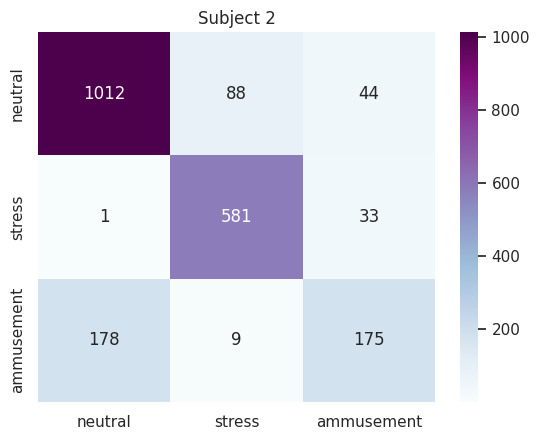

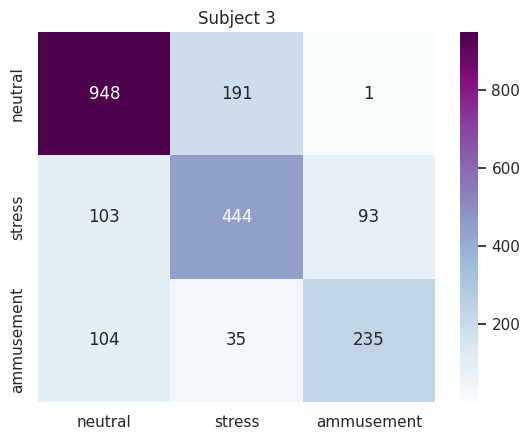

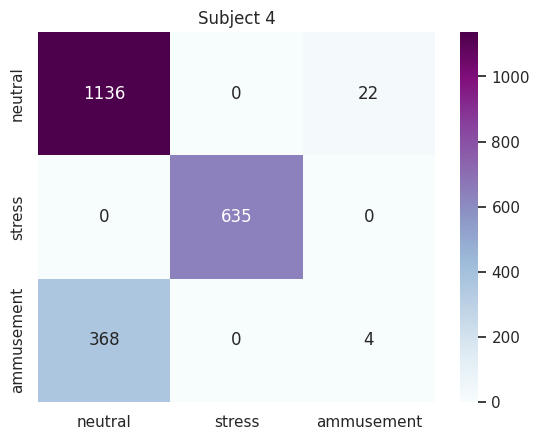

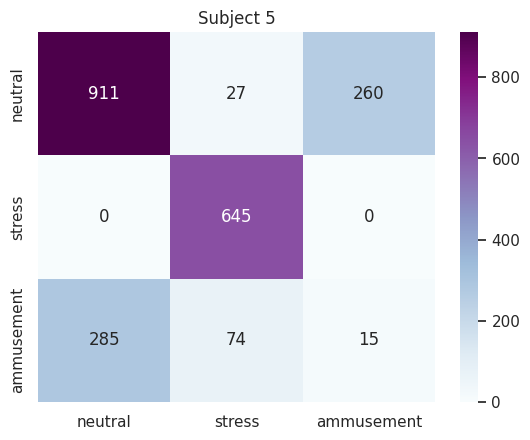

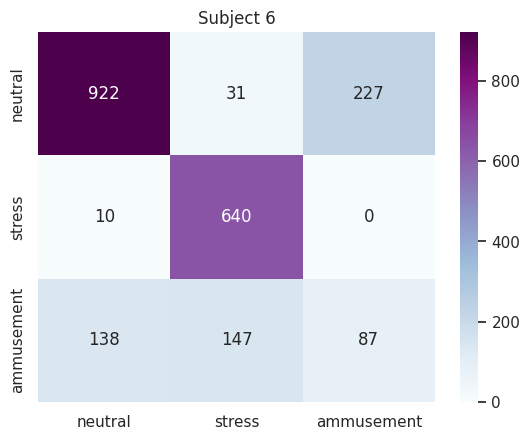

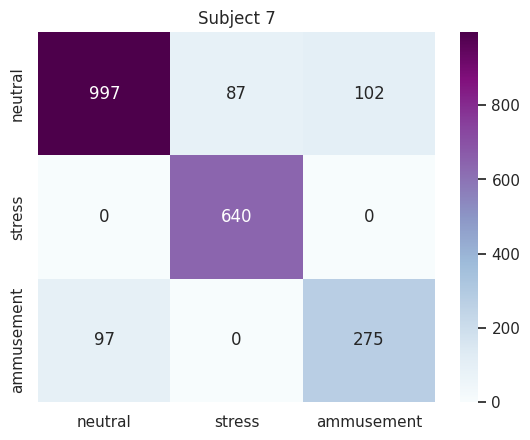

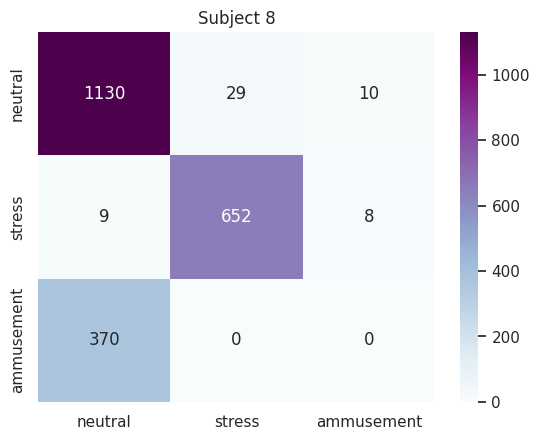

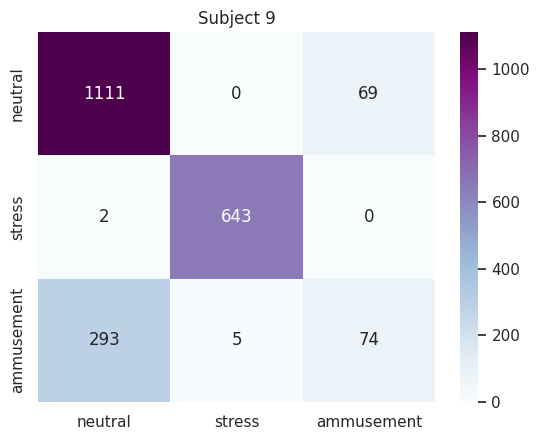

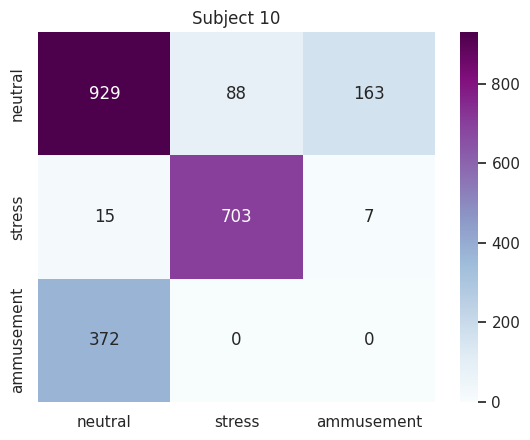

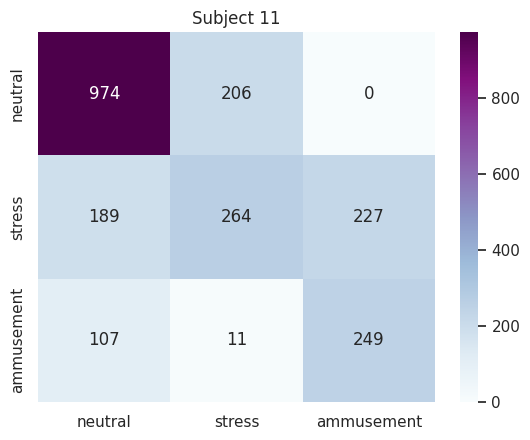

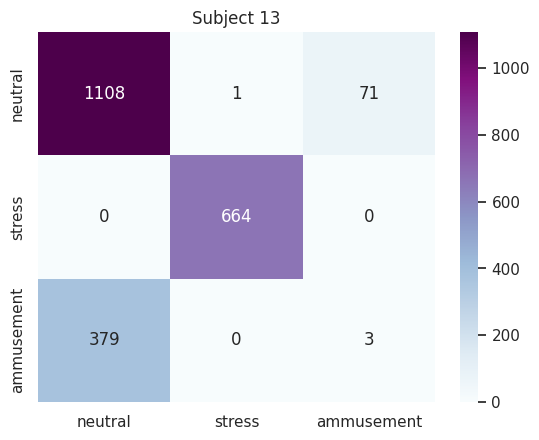

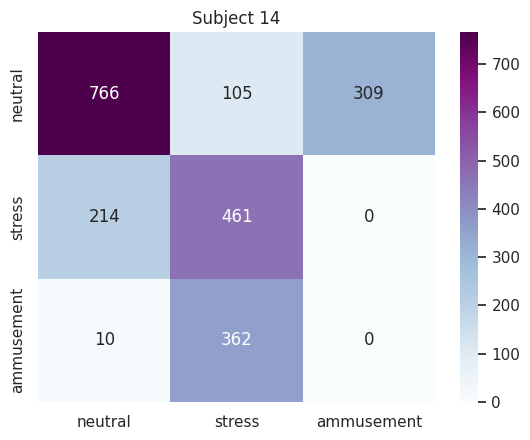

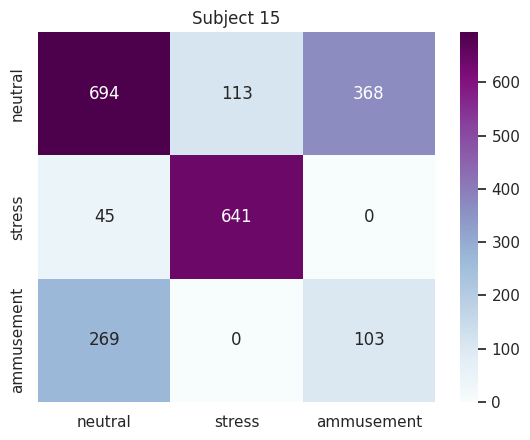

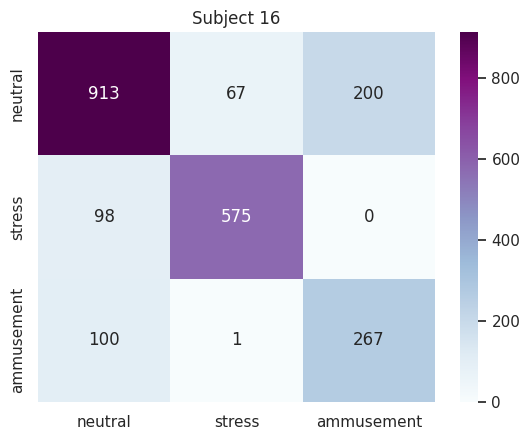

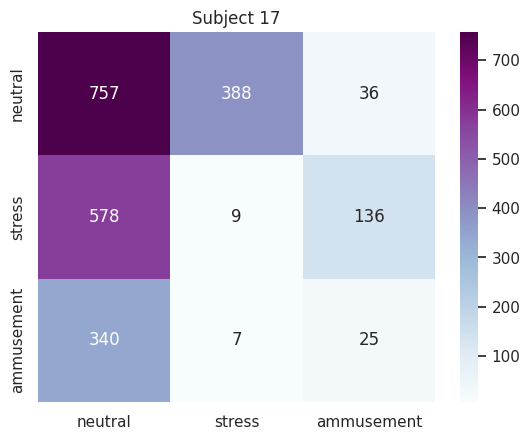

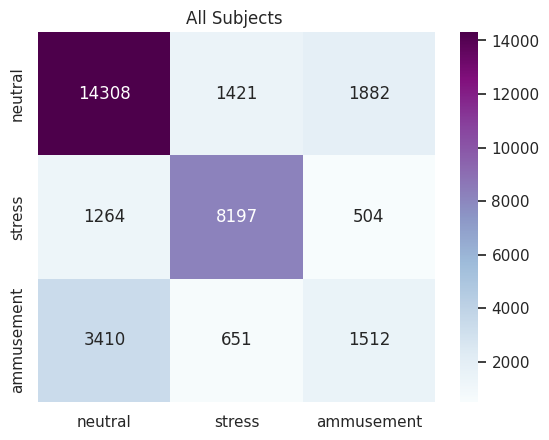

In [42]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
cm_all = np.zeros((3,3))
class_names = ['neutral', 'stress', 'ammusement']
for sid, cm in list(zip(np.array(scores_w)[:,0], cms)):
    #print("Subject ", int(sid))
    cm_all += cm
    df_cm = pd.DataFrame(cm, columns=class_names, index=class_names)
    sn.set(font_scale=1) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
    plt.title("Subject " + str(int(sid)))
    plt.show()

df_cm = pd.DataFrame(cm_all.astype(int), columns=class_names, index=class_names)
sn.set(font_scale=1) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cmap="BuPu",  fmt='d') # font size
plt.title("All Subjects ")
plt.show()

## Accuracies plot

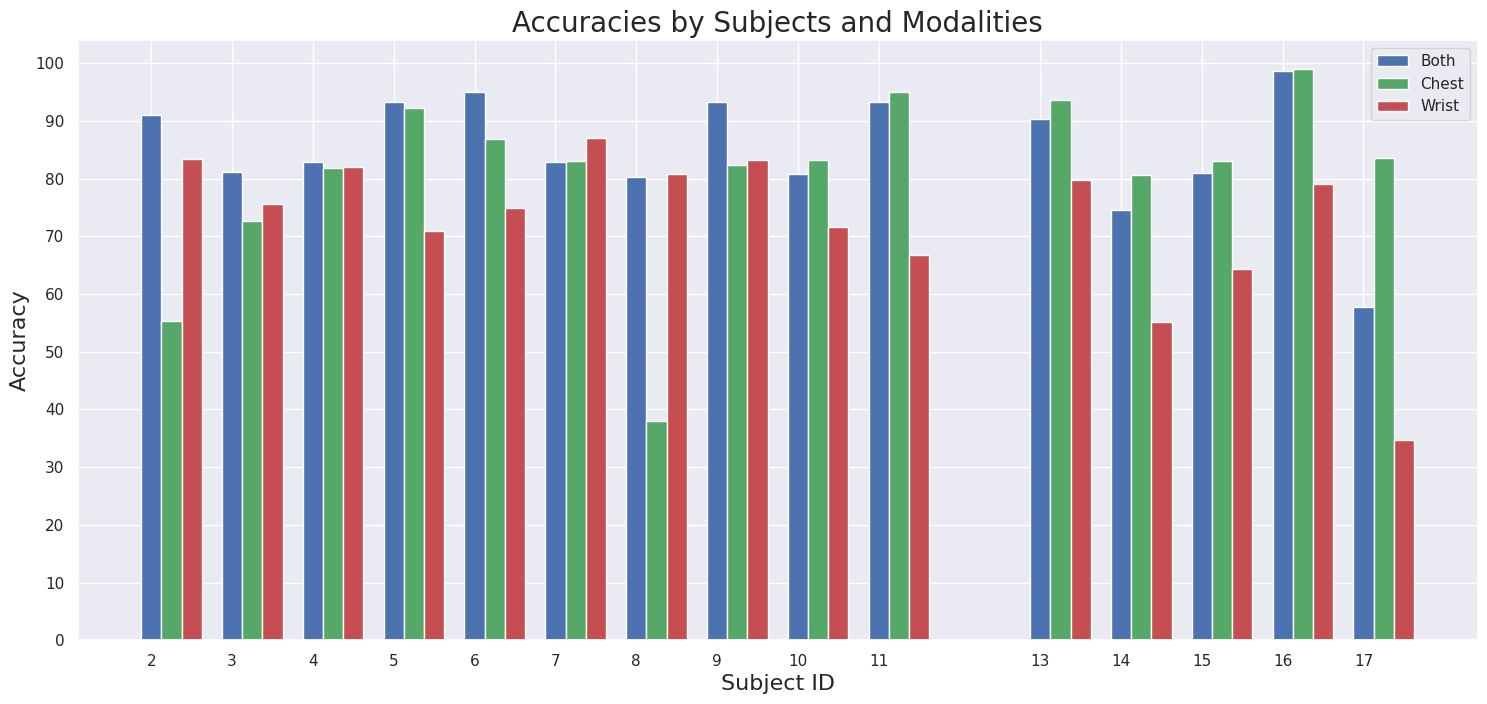

In [43]:
import matplotlib.pyplot as plt

X = np.arange(15)
fig = plt.figure(figsize=(14, 6))
ax = fig.add_axes([0,0,1,1])
width = 0.25
ind = np.array(scores_all)[:,0].astype(int)
ax.set_xticks(ind)
ax.set_yticks(np.arange(0, 101, 10))
ax.set_ylabel('Accuracy', fontsize=16)
ax.set_xlabel('Subject ID', fontsize=16)
ax.set_title("Accuracies by Subjects and Modalities", fontsize=20)
ax.bar(ind+0.00, np.array(scores_all)[:,1]*100, color = 'b', width = 0.25)
ax.bar(ind+0.25, np.array(scores_c)[:,1]*100, color = 'g', width = 0.25)
ax.bar(ind+0.50, np.array(scores_w)[:,1]*100, color = 'r', width = 0.25)
ax.legend(labels=['Both', 'Chest', 'Wrist'])


## F1-score plot

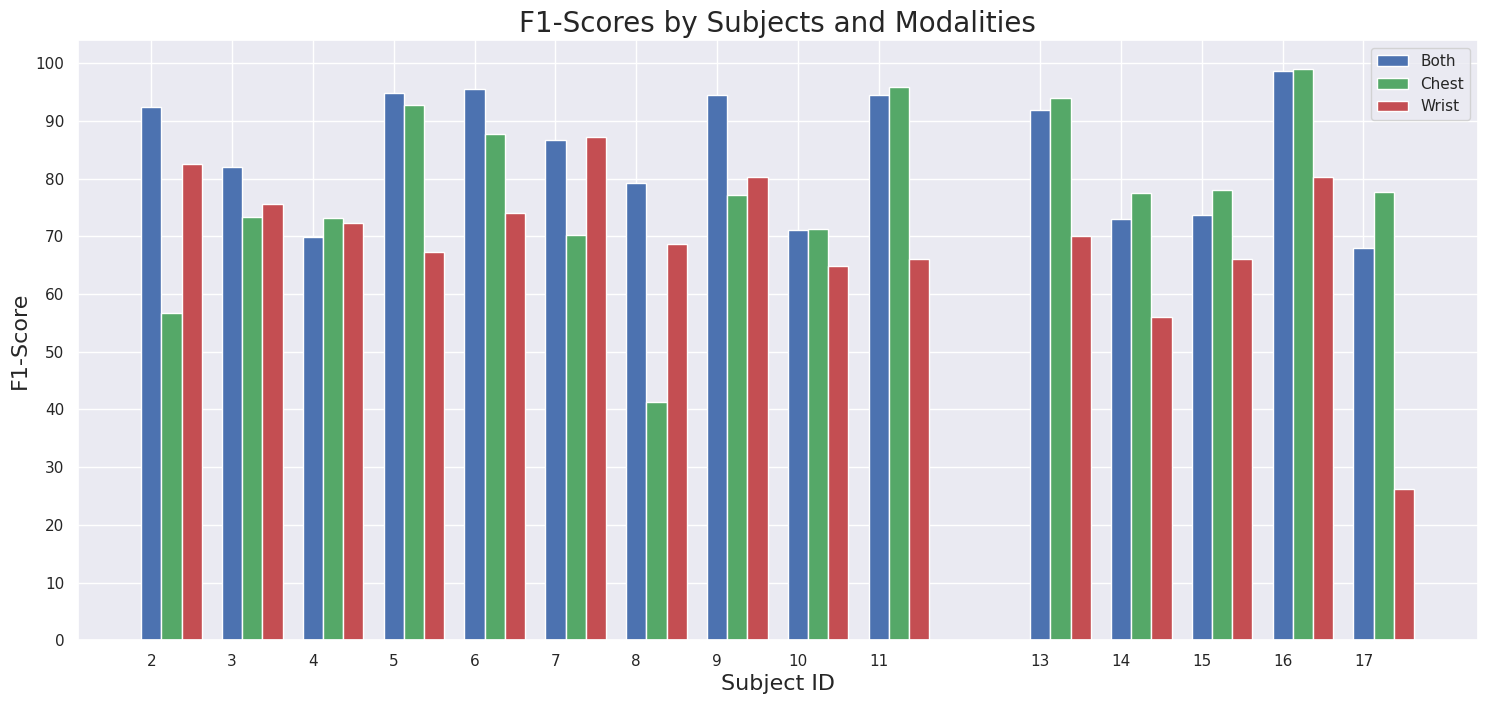

In [44]:
import matplotlib.pyplot as plt

X = np.arange(15)
fig = plt.figure(figsize=(14, 6))
ax = fig.add_axes([0,0,1,1])
width = 0.25
ind = np.array(scores_all)[:,0].astype(int)
ax.set_xticks(ind)
ax.set_yticks(np.arange(0, 101, 10))
ax.set_ylabel('F1-Score', fontsize=16)
ax.set_xlabel('Subject ID', fontsize=16)
ax.set_title("F1-Scores by Subjects and Modalities", fontsize=20)
ax.bar(ind+0.00, np.array(scores_all)[:,2]*100, color = 'b', width = 0.25)
ax.bar(ind+0.25, np.array(scores_c)[:,2]*100, color = 'g', width = 0.25)
ax.bar(ind+0.50, np.array(scores_w)[:,2]*100, color = 'r', width = 0.25)
ax.legend(labels=['Both', 'Chest', 'Wrist'])